# Info
Name:  

    TCAP_cloud

Purpose:  

    To compare the various cloud properties retrieved via different methods from TCAP.
    Looking at the Feb, 19th, 2013 case
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - load_modis.py : for loading modis files
    - matplotlib
    - numpy
    - scipy : for saving and reading
    - math
    - os
    - gc
    - pdb
    - datetime
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - 20151117_zen_cld_retrieved.mat: cloud retrieval file
  - MYD06_L2.A2015321.1540.006.2015322185040.hdf: MODIS file
  
Modification History:

    Written: Samuel LeBlanc, NASA Ames, Santa Cruz, CA, 2016-04-06
    Modified: 

# Import initial modules and default paths


In [2]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import scipy.io as sio
import Sp_parameters as Sp
import hdf5storage as hs
import load_modis as lm
import os

In [3]:
from mpl_toolkits.basemap import Basemap,cm

In [4]:
import write_utils as wu
import plotting_utils as pu
import map_utils as mu
import Run_libradtran as RL

In [5]:
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [6]:
# set the basic directory path
fp='C://Users//sleblan2//Research//TCAP//'

# Load the various data

## Verify the retrievals from 4STAR

### Build the proper lut from the idl out file

In [7]:
vv = 'v1'

In [8]:
# load the idl save file containing the modeled radiances
s = sio.idl.readsav(fp+'model/sp_v1_20130219_4STAR.out')
print s.keys()
print 'sp', s.sp.shape
print 'sp (wp,   wvl,  z,  re,  ta)'

['tau', 'ab', 'pw', 'sp_irrdn', 'sp', 'zenlambda', 'sza', 'zout', 'sp_irrup', 'z', 'ref']
sp (2L, 1556L, 2L, 35L, 24L)
sp (wp,   wvl,  z,  re,  ta)


### Compare to lut from NAAMES

In [21]:
fp_lut_mat = 'C:\\Users\\sleblan2\\Research\\NAAMES\\lut\\v2_NAAMES_lut.mat'
print('Loading the lut file:{}'.format(fp_lut_mat))
if not os.path.isfile(fp_lut_mat):
    print('File {} does not exist'.format(fp_lut_mat))
    raise IOError('LUT File not found: {}'.format(fp_lut_mat))
luts = hs.loadmat(fp_lut_mat)

Loading the lut file:C:\Users\sleblan2\Research\NAAMES\lut\v2_NAAMES_lut.mat


In [22]:
luts.keys()

[u'tau',
 u'rad',
 u'sza',
 u'irr_dn_diff',
 u'irr_dn',
 u'zout',
 u'wvl',
 u'phase',
 u'ref',
 u'irr_up']

In [23]:
luts['irr_up'].shape

(2L, 1302L, 3L, 34L, 29L, 15L)

In [27]:
luts['rad'].shape, s.sp.shape

((2L, 1302L, 3L, 34L, 29L, 15L), (2L, 1556L, 2L, 35L, 24L))

In [28]:
s.sp[:,:,:,:,:,np.newaxis].shape

(2L, 1556L, 2L, 35L, 24L, 1L)

In [38]:
s.ref

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  20.,  22.,  23.,  25.,  28.,
        30.,  32.,  35.,  38.,  40.,  43.,  45.,  48.,  50.,  52.,  55.,
        58.,  60.], dtype=float32)

In [39]:
luts['ref']

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  17.,  19.,  21.,  23.,  25.,  27.,  29.,  30.,
        33.,  35.,  38.,  40.,  43.,  45.,  48.,  50.,  53.,  55.,  58.,
        60.])

### reshape TCAP LUT to fit NAAMES format and save new file

In [54]:
tcap_lut = {u'tau':s.tau,
            u'rad':s.sp[:,:,:,:,:,np.newaxis],
            u'sza':np.array(s.sza)[np.newaxis],
            u'irr_dn_diff':s.sp_irrdn[:,:,:,:,:,np.newaxis]*0.0,
            u'irr_dn':s.sp_irrdn[:,:,:,:,:,np.newaxis],
            u'irr_up':s.sp_irrup[:,:,:,:,:,np.newaxis],
            u'zout':s.zout,
            u'wvl':s.zenlambda,
            u'phase':['wc','ic'],
            u'ref':s.ref}

In [55]:
hs.savemat(fp+'model\\{}_TCAP_lut.mat'.format(vv),tcap_lut)

### Run the retrieval via the run_zen_cld_retrieval command line
in the python_codes directory:

> python Run_zen_cld_retrieval.py -lut C:\Users\sleblan2\Research\TCAP\model\v1_TCAP_lut.mat C:\Users\sleblan2\Research\TCAP\20130219starzen.mat -o C:\Users\sleblan2\Research\TCAP\plots\ 

## Check the 4STAR data

In [12]:
ss = sio.loadmat(fp+'20130219starzen.mat')

In [13]:
ss.keys()

['Str',
 'sza',
 'm_ray',
 'toggle',
 'pitch',
 'Tst',
 'fwhm',
 'nirt',
 'O3h',
 'NO2col',
 'Headng',
 'RH',
 'Pst',
 'nirheader',
 'iset',
 'sd_aero_crit',
 'nirTint_rad',
 'dark',
 'nirVdettemp',
 'Elstep',
 'nircols',
 'sunaz',
 'O3col',
 'nirfilen',
 'f',
 'flagallcolsitems',
 't',
 'c0mod',
 'flagallcols',
 'rate',
 'program_version',
 'sat_time',
 'sat_set_vis',
 'visheader',
 'nirTint',
 'filename',
 'rads',
 'nirsat_pixel',
 'Md',
 'aeronetcols',
 'visAVG',
 'Zn',
 'AZstep',
 't_rad',
 'darkstd',
 'QdVtot',
 'nirAVG',
 'w',
 'ELcorr',
 'sat_nir',
 'visVdettemp_C',
 'El_deg',
 'skyresp',
 'Lon',
 'AZ_deg',
 'visrow_labels',
 'm_H2O',
 'c0err',
 'viscols',
 'visTint_rad',
 'sat_vis',
 'flagitems',
 'aerosolcols',
 'vissat_pixel',
 'flag',
 'visfilen',
 'c0',
 'Tprecon_C',
 'raw',
 '__header__',
 'rawcorr',
 'sat_ij',
 'sunel',
 'visTint',
 'Tbox_C',
 'QdVtb',
 'rad',
 'QdVlr',
 'nirVdettemp_C',
 'visVdettemp',
 'nirrow_labels',
 'm_aero',
 'Tbox',
 'Tprecon',
 'ng',
 'note',
 'R

In [14]:
ss['t'].shape

(3297L, 1L)

In [15]:
ss['rad'].shape

(3297L, 1556L)

<IPython.core.display.Javascript object>


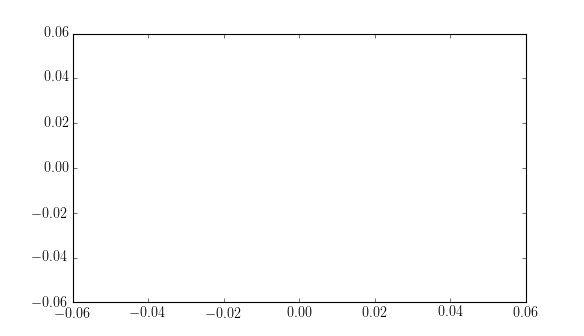

In [16]:
plt.figure()
plt.plot(ss['t'],ss['rad'][:,400])

## Load the retrieved cloud properties from 4STAR

In [27]:
star = hs.loadmat(fp+'4STAR//20130219_zen_cld_retrieved.mat')

In [28]:
star.keys()

[u'tau', u'utc', u'ki', u'sza', u'lon', u'lat', u'phase', u'alt', u'ref']

<IPython.core.display.Javascript object>


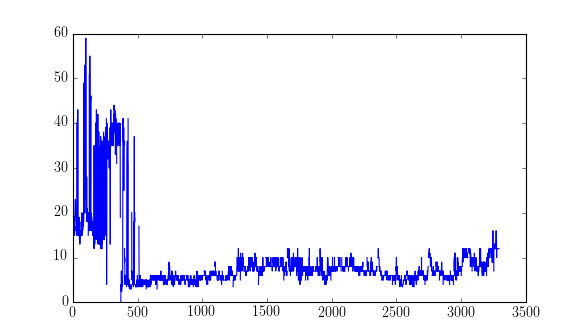

In [29]:
plt.figure()
plt.plot(star['tau'])